# Join and Reshape Data

**Importing Libraries**

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns

### Concatinating DataFrames

In [307]:
# Make DataFrames
df1 = pd.DataFrame(np.random.rand(3,2),
                  columns = ['cat', 'dog'])
df2 = pd.DataFrame(np.random.rand(3,2),
                  columns = ['cat', 'dog'])

# Print out the DataFrames
print(df1); print(df2)

        cat       dog
0  0.825800  0.948374
1  0.607862  0.688207
2  0.883582  0.128196
        cat       dog
0  0.085750  0.729394
1  0.999824  0.041104
2  0.286985  0.555839


**Concatinating on the row index**

In [308]:
# Concatinating the two DataFrames ignoring the index
pd.concat([df1, df2], ignore_index=True)

,cat,dog
0,0.825800,0.948374
1,0.607862,0.688207
2,0.883582,0.128196
3,0.085750,0.729394
4,0.999824,0.041104
5,0.286985,0.555839


**Concatenating on the column axis**

In [309]:
# Create the new DataFrame
df3 = pd.DataFrame(np.random.rand(3,2),
                  columns = ['bird', 'horse'])

# Concatenate it with one of the previous examples
pd.concat([df1, df3], axis=1)

,cat,dog,bird,horse
0,0.825800,0.948374,0.799071,0.817401
1,0.607862,0.688207,0.012518,0.208103
2,0.883582,0.128196,0.171200,0.973418


In [310]:
# Create the DataFrames

data4 = {'Alpaca':['A1', 'A2', 'A3'], 'Bird':['B1', 'B2', 'B3'],
        'Camel':['C1', 'C2', 'C3']} 
df4 = pd.DataFrame(data4)
print(df4)

data5 = {'Bird':['B3', 'B4', 'B5'], 'Camel':['C3', 'C4', 'C5'],
        'Duck':['D3', 'D4', 'D5']} 
df5 = pd.DataFrame(data5, index=[3,4,5])
print(df5)

# Joining on by default on outer
print(pd.concat([df4, df5], sort=False))

  Alpaca Bird Camel
0     A1   B1    C1
1     A2   B2    C2
2     A3   B3    C3
  Bird Camel Duck
3   B3    C3   D3
4   B4    C4   D4
5   B5    C5   D5
  Alpaca Bird Camel Duck
0     A1   B1    C1  NaN
1     A2   B2    C2  NaN
2     A3   B3    C3  NaN
3    NaN   B3    C3   D3
4    NaN   B4    C4   D4
5    NaN   B5    C5   D5


In [311]:
# Joining DataFrames on inner
print(pd.concat([df4, df5], sort=False, join='inner'))

  Bird Camel
0   B1    C1
1   B2    C2
2   B3    C3
3   B3    C3
4   B4    C4
5   B5    C5


### Merging DataFrams
- left - one of the DataFrames to merge
- right - the other DataFrame to merge
- how - specifies the kind of merge to make
- on - the column on which to merge; needs to be in both DataFrames
- left_on - the column to join on in the left DataFrame
- right_on - the column to join on in the right DataFrame
- left_index or right_index - use the index from the left/right DataFrame as the join key(s)

**Default merge if merge column has same name**

In [312]:
# Create DataFrames
df1 = pd.DataFrame({'day': ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'],
                   'weather': ['sunny', 'windy', 'rainy', 'cloudy', 'cold']})
df2 = pd.DataFrame({'day': ['Wed', 'Fri', 'Mon', 'Thurs', 'Tues'],
                   'temp': [88, 75, 62, 65, 53]})

# Display the DataFrames
display(df1)
display(df2)

# Merging the two DataFrames
df3 = pd.merge(df1, df2)
display(df3)

,day,weather
0,Mon,sunny
1,Tues,windy
2,Wed,rainy
3,Thurs,cloudy
4,Fri,cold


,day,temp
0,Wed,88
1,Fri,75
2,Mon,62
3,Thurs,65
4,Tues,53


,day,weather,temp
0,Mon,sunny,62
1,Tues,windy,53
2,Wed,rainy,88
3,Thurs,cloudy,65
4,Fri,cold,75


**Merging specifying index names for each dataframe**

In [313]:
# Change the column name day -> day_of_week
df2_new = pd.DataFrame({'day_of_week': ['Wed', 'Fri', 'Mon', 'Thurs', 'Tues'],
                   'temp': [88, 75, 62, 65, 53]})

df4 = pd.merge(df1, df2_new, left_on='day', right_on='day_of_week').drop('day_of_week', axis=1)
display(df4)

,day,weather,temp
0,Mon,sunny,62
1,Tues,windy,53
2,Wed,rainy,88
3,Thurs,cloudy,65
4,Fri,cold,75


**Handeling joins with missing data**

In [314]:
df6 = pd.DataFrame({'name': ['Snowball', 'Bob', 'Tweetie', 'Fluffy'],
                   'type': ['cat', 'rat', 'bird', 'dog']})

df7 = pd.DataFrame({'name': ['Snowball', 'Bob'],
                   'weight': [400, 749]})

# Display before merging
display(df6); display(df7)

# Joing with inner and outer
df8_inner = pd.merge(df6, df7, how='inner')
df8_outer = pd.merge(df6, df7, how='outer')

# Displaying the diffrence
display(df8_outer); display(df8_inner)

,name,type
0,Snowball,cat
1,Bob,rat
2,Tweetie,bird
3,Fluffy,dog


,name,weight
0,Snowball,400
1,Bob,749


,name,type,weight
0,Snowball,cat,400.0
1,Bob,rat,749.0
2,Tweetie,bird,NaN
3,Fluffy,dog,NaN


,name,type,weight
0,Snowball,cat,400
1,Bob,rat,749


**Setting index and using join method**
- nice way to join without having to do a full merge

In [315]:
# Reset indices 
df1a = df1.set_index('day')
df2a = df2.set_index('day')

df1a.join(df2a, on='day')

,weather,temp
day,,
Mon,sunny,62
Tues,windy,53
Wed,rainy,88
Thurs,cloudy,65
Fri,cold,75


**Using merge on left_index and right_index**
- usefull if the merge feature is in the index

In [316]:
# Creating DataFrames
df9 = pd.DataFrame({'day': ['Wed', 'Fri', 'Mon', 'Thurs', 'Tues'],
                   'temp': [88, 75, 62, 65, 53]})

df10 = pd.DataFrame({'day_of_week': ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'],
                   'weather': ['sunny', 'windy', 'rainy', 'cloudy', 'cold']})

# Setting Indexes
df9 = df9.set_index('day')
df10 = df10.set_index('day_of_week')

# Merging on inde
df11 = pd.merge(df9, df10, left_index=True, right_index=True)
display(df11)

,temp,weather
Wed,88,rainy
Fri,75,cold
Mon,62,sunny
Thurs,65,cloudy
Tues,53,windy


### Tidy Data
- .melt()
- .pivot()

**Example of melting a Dataframe**

In [317]:
# Create a DataFrame
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5}
                  })
display(df)

# Applying melt to the dataframe
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,B
0,a,1
1,b,3
2,c,5


,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


**Example Pivoting a DataFrame**

In [318]:
# Create the DataFrame
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6]})

# Look at the DataFrame
display(df)

# Applying the pivot to the DataFrame
df.pivot(index="foo", columns="bar", values="baz")

,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,C,3
3,two,A,4
4,two,B,5
5,two,C,6


bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


### Pivoting Seaborn's Flights Dataset

In [319]:
# Loading in dataset
df = sns.load_dataset("flights")
df.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [320]:
# Makeing dataset "un-tidy" in wide format for better graphing
df = df.pivot(index="year", columns="month", values="passengers")
df.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


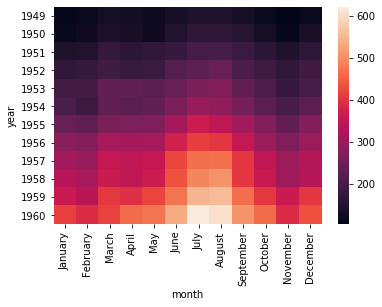

In [321]:
ax = sns.heatmap(df)

**Reversing pivot of flights dataset**

In [322]:
# Removing Catagory Index type
df.columns = df.columns.astype(str)
# reseting index and creating year feature
df = df.reset_index()

# Melting the dataframe to tidy format
df = df.melt(id_vars="year", value_vars=["January", "February", "March", "April", "May", "June", "July",	"August", "September", "October", "November", "December"])
df = df.rename(columns = {'value':'passengers'})
df.head(100)


,year,month,passengers
0,1949,January,112
1,1950,January,115
2,1951,January,145
3,1952,January,171
4,1953,January,196
...,...,...,...
95,1960,August,606
96,1949,September,136
97,1950,September,158
98,1951,September,184


**Using Pivot on attention seaborn Dataset**

In [323]:
df = sns.load_dataset("attention")
df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [324]:
df = df.pivot(index="solutions", columns="subject", values="score")
df.head()

subject,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
solutions,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,3.0,5.0,4.0,5.0,5.0,5.0,2.0,6.0,6.0,8.0,6.0,8.0,8.0,6.0,7.0,7.0,5.0,6.0
2,4.0,4.0,5.0,7.0,5.0,5.0,4.5,7.0,3.0,5.0,5.0,9.0,5.0,8.0,8.0,8.0,7.0,8.0,6.0,6.0
3,7.0,5.0,6.0,5.0,8.0,6.0,6.0,8.0,7.0,6.0,6.0,8.0,9.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0
